# **Proyek Probabilitas dan Stokastik (Probstok)**

A Predictive Framework for Cyber Security Analytics using Attack Graph

By:
*   Michael Ariyanto / 1706043235
*   Alexander Patrick / 1706043292
*   Nicholas / 1706043254

In [163]:
import pandas
import numpy

print('Cobham EXPLORER 710, firmware version 1.07')
print('VULNERABILITY DATA')

data = pandas.DataFrame ([
                         {'Service Name' : 'Firmware Image', 'CVE-ID' : 'CVE-2019-9534', 'Exploitability Score' : '7.8'},
                         {'Service Name' : 'No Access Restriction', 'CVE-ID' : 'CVE-2019-9530', 'Exploitability Score' : '5.5'},
                         {'Service Name' : 'No Authentication', 'CVE-ID' : 'CVE-2019-9529', 'Exploitability Score' : '5.5'},
                         {'Service Name' : 'Unauthenticated Access', 'CVE-ID' : 'CVE-2019-9531', 'Exploitability Score' : '9.8'},
                         {'Service Name' : 'Clear Text', 'CVE-ID' : 'CVE-2019-9532', 'Exploitability Score' : '7.8'},
                         {'Service Name' : 'Root Password', 'CVE-ID' : 'CVE-2019-9533', 'Exploitability Score' : '9.8'}
                        ])

data

Cobham EXPLORER 710, firmware version 1.07
VULNERABILITY DATA


,Service Name,CVE-ID,Exploitability Score
0,Firmware Image,CVE-2019-9534,7.8
1,No Access Restriction,CVE-2019-9530,5.5
2,No Authentication,CVE-2019-9529,5.5
3,Unauthenticated Access,CVE-2019-9531,9.8
4,Clear Text,CVE-2019-9532,7.8
5,Root Password,CVE-2019-9533,9.8


In [0]:
import numpy as np
import random as rm
import pandas
import matplotlib.pyplot as plt

states = ['Firmware Image', 
          'No Access Restriction',
          'No Authentication',
          'Unauthenticated Access',
          'Clear Text',
          'Root Password']

transition = [
              ['AA', 'AB', 'AC', 'AD', 'AE', 'AF'],
              ['BA', 'BB', 'BC', 'BD', 'BE', 'BF'],
              ['CA', 'CB', 'CC', 'CD', 'CE', 'CF'],
              ['DA', 'DB', 'DC', 'DD', 'DE', 'DF'],
              ['EA', 'EB', 'EC', 'ED', 'EE', 'EF'],
              ['FA', 'FB', 'FC', 'FD', 'FE', 'FF']
             ]

transitionmatrix = [
                    [0,0.264,0.264,0.472,0,0],
                    [0,0,0,0,0,1],
                    [0,0.238,0,0.426,0.336,0],
                    [0,0.192,0.192,0,0.271,0.345],
                    [0,0.5,0.5,0,0,0],
                    [0,0,0,0,0,1],
                   ]

def vulnerable(trial):
  stateall = []
  i = 0

  while i != trial:
    statelist = []
    statenow = states[0]
    statelist.append(statenow)
    while statenow != states[5]:
      if statenow == 'Firmware Image':
        newstate = np.random.choice(transition[0], replace = True, p = transitionmatrix[0])
        if newstate == 'AB':
          statelist.append(states[1])
          statenow = states[1]
        elif newstate == 'AC':
          statelist.append(states[2])
          statenow = states[2]
        elif newstate == 'AD':
          statelist.append(states[3])
          statenow = states[3]
        else:
          pass
      elif statenow == 'No Access Restriction':
        newstate = np.random.choice(transition[1], replace = True, p = transitionmatrix[1])
        if newstate == 'BF':
          statelist.append(states[5])
          statenow = states[5]
        else:
          pass
      elif statenow == 'No Authentication':
        newstate = np.random.choice(transition[2], replace = True, p = transitionmatrix[2])
        if newstate == 'CB':
          statelist.append(states[1])
          statenow = states[1]
        elif newstate == 'CD':
          statelist.append(states[3])
          statenow = states[3]
        elif newstate == 'CE':
          statelist.append(states[4])
          statenow = states[4]
        else:
          pass
      elif statenow == 'Unauthenticated Access':
        newstate = np.random.choice(transition[3], replace = True, p = transitionmatrix[3])
        if newstate == 'DB':
          statelist.append(states[1])
          statenow = states[1]
        elif newstate == 'DC':
          statelist.append(states[2])
          statenow = states[2]
        elif newstate == 'DE':
          statelist.append(states[4])
          statenow = states[4]
        elif newstate == 'DF':
          statelist.append(states[5])
          statenow = states[5]
        else:
          pass
      elif statenow == 'Clear Text':
        newstate = np.random.choice(transition[4], replace = True, p = transitionmatrix[4])
        if newstate == 'EB':
          statelist.append(states[1])
          statenow = states[1]
        elif newstate == 'EC':
          statelist.append(states[2])
          statenow = states[2]
        else:
          pass
    stateall.append(statelist)
    i += 1
  
  #print('\n'.join([str(lst) for lst in stateall]))

  count(stateall)

In [0]:
def count(stateall):
  A = 0
  B = 0
  C = 0
  D = 0
  E = 0
  F = 0

  for x in range(len(stateall)):
    for y in range(len(stateall[x])):
      if stateall[x][y] == 'Firmware Image':
        A += 1
      elif stateall[x][y] == 'No Access Restriction':
        B += 1
      elif stateall[x][y] == 'No Authentication':
        C += 1
      elif stateall[x][y] == 'Unauthenticated Access':
        D += 1
      elif stateall[x][y] == 'Clear Text':
        E += 1
      elif stateall[x][y] == 'Root Password':
        F += 1

  vulnerability = pandas.DataFrame([
                                    {'State': 'Firmware Image', 'Vulnerability' : A},
                                    {'State': 'No Access Restriction', 'Vulnerability' : B},
                                    {'State': 'No Authenticatione', 'Vulnerability' : C},
                                    {'State': 'Unauthenticated Access', 'Vulnerability' : D},
                                    {'State': 'Clear Text', 'Vulnerability' : E},
                                    {'State': 'Root Password', 'Vulnerability' : F}
                                  ])
  vulnerability

  lststate = []
  lststate.append(A)
  lststate.append(B)
  lststate.append(C)
  lststate.append(D)
  lststate.append(E)
  lststate.append(F)  

  plt.plot(lststate, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)
  plt.xlim(0,5)
  plt.ylim(0,70)
  plt.xlabel('State')
  plt.ylabel('Vulnerability')
  plt.title('Vulnerability')

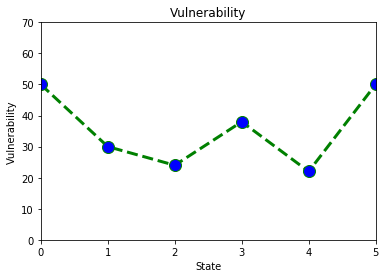

In [184]:
vulnerable(50)

From the graph above, we can conclude that State 3 of 'Unauthenticated Access' is the most vulnerable spot in the 'Cobham EXPLORER 710, firmware version 1.07' and must be patched as fast as possible. We ignore State 0 of 'Firmware Image' and State 5 of 'Root Password' since they both the start and the end if an attack happened.